In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = 'True'

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim 
from torchvision.datasets.mnist import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [3]:
data_train = MNIST(
    "./data/mnist", download=True, transform=transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor()
    ])
)

data_test = MNIST(
    "./data/mnist", download=True, train=False, 
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor()
    ])
)

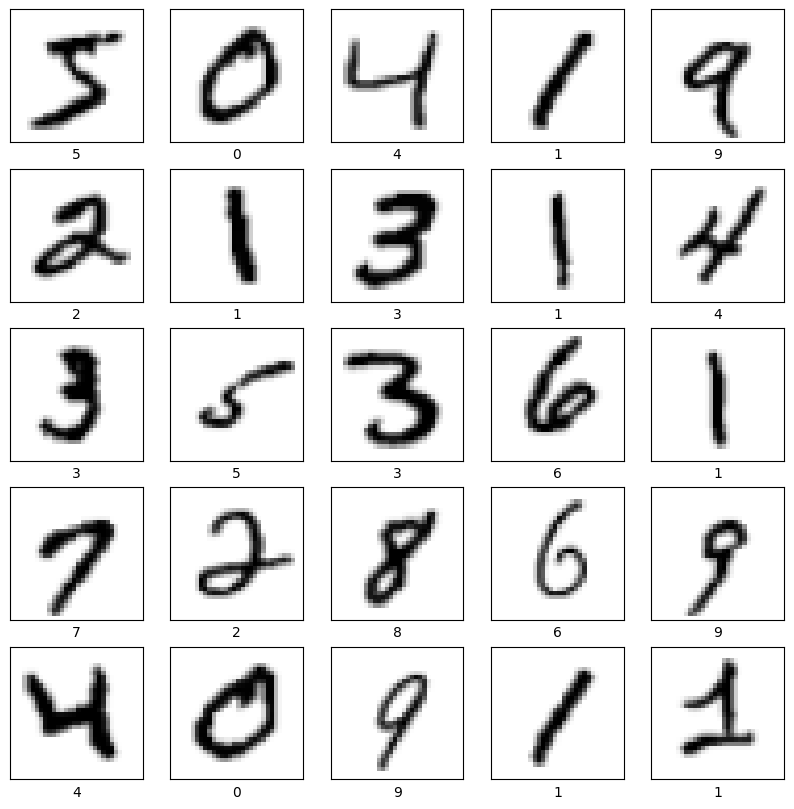

In [4]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[i][0].permute(1, 2, 0).numpy(), cmap=plt.cm.binary)
    plt.xlabel(data_train[i][1])
plt.show()

In [5]:
BATCH_SIZE = 128
EPOCHS = 20

In [6]:
train_dataloader = DataLoader(data_train, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(data_test, batch_size=BATCH_SIZE)

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
model = nn.Sequential(
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
).to(device)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [10]:
for (images, labels) in train_dataloader:
    break

In [11]:
def train(epoch):
    model.train()
    loss_list = []
    
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        loss_list.append(loss.detach().cpu().item())
    
    avg_loss = sum(loss_list) / len(loss_list)
    print(f"[Train][Epoch {epoch}] Average Loss: {avg_loss:.5f}")

In [12]:
def test(epoch):
    model.eval()
    total_correct = 0
    avg_loss = 0.0
    
    with torch.no_grad():
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.shape[0], -1)
            
            output = model(images)
            
            avg_loss += criterion(output, labels).sum()
            
            pred = output.detach().max(1)[1]
            
            total_correct += pred.eq(labels.view_as(pred)).sum()
            
    avg_loss /= len(data_test)
    accuracy = float(total_correct) / len(data_test)
    
    print(f"[Test][Epoch {epoch}] Loss: {avg_loss:.5f}, Accuracy: {accuracy:3f}")
    return avg_loss

In [13]:
def run():
    for epoch in range(EPOCHS):
        train(epoch)
        val_loss = test(epoch)

In [14]:
run()

[Train][Epoch 0] Average Loss: 0.28119
[Test][Epoch 0] Loss: 0.00100, Accuracy: 0.961500
[Train][Epoch 1] Average Loss: 0.10331
[Test][Epoch 1] Loss: 0.00071, Accuracy: 0.970900
[Train][Epoch 2] Average Loss: 0.07041
[Test][Epoch 2] Loss: 0.00057, Accuracy: 0.979300
[Train][Epoch 3] Average Loss: 0.05016
[Test][Epoch 3] Loss: 0.00056, Accuracy: 0.979200
[Train][Epoch 4] Average Loss: 0.04189
[Test][Epoch 4] Loss: 0.00051, Accuracy: 0.980900
[Train][Epoch 5] Average Loss: 0.03251
[Test][Epoch 5] Loss: 0.00052, Accuracy: 0.979600
[Train][Epoch 6] Average Loss: 0.02442
[Test][Epoch 6] Loss: 0.00058, Accuracy: 0.978900
[Train][Epoch 7] Average Loss: 0.02329
[Test][Epoch 7] Loss: 0.00058, Accuracy: 0.980700
[Train][Epoch 8] Average Loss: 0.01913
[Test][Epoch 8] Loss: 0.00073, Accuracy: 0.975500
[Train][Epoch 9] Average Loss: 0.01952
[Test][Epoch 9] Loss: 0.00058, Accuracy: 0.981000
[Train][Epoch 10] Average Loss: 0.01485
[Test][Epoch 10] Loss: 0.00056, Accuracy: 0.982300
[Train][Epoch 11] A